<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **검증 세트(Validation Set)**

지금까지 훈련 세트에서 모델을 훈련하고 테스트 세트에서 모델을 평가하고 하이퍼파라미터 튜닝을 했다.

하지만 테스트 세트로 하이퍼파라미터 튜닝을 하면 결국 테스트 세트에 잘 맞는 모델을 만들게 되는 것이다.

이전까지는 문제를 간단히 하려고 테스트 세트를 사용했다.

테스트 세트는 최종 모델을 서비스에 투입하거나 어떤 제품에 투입한 다음에 나올 성능을 예측하기 위해서 사용한 것이다.

최종 모델을 실전에 투입하면 당연히 데이터는 타깃이 없고, 특성만 있을 것이다.

모델은 이 특성을 가지고 예측을 할 것이다.

그러려면 실전에 투입했을 때 어느 정도의 성능을 낼지에 대한 기대값을 보고 서비스에 투입할 수 있을 것이다.

그래서 테스트 세트에서 얻은 점수를 보고 그 기대값을 판단하는 것이다.

즉, 일반화 성능을 가늠하는 것이다.

그렇기 때문에 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 테스트 세트를 사용하지 않고, 모델을 만들고 나서 마지막에 최종적으로 딱 한 번만 사용하는 것이 좋다.

테스트 세트 = 처음 본 데이터(실전에 투입했을 때 사용되는 데이터)

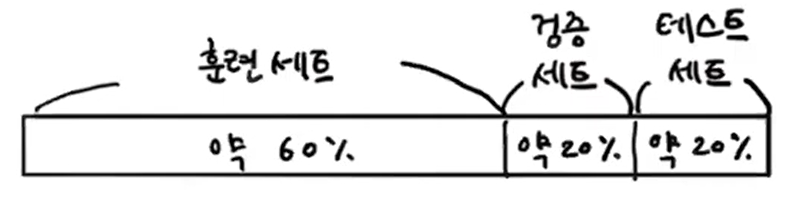

테스트 세트를 사용하지 않으면 모델이 과소적합인지 과대적합인지 판단하기 어렵다.

그래서 테스트 세트를 사용하지 않고 이를 측정하는 간단한 방법이 훈련 세트와 테스트 세트로 나누고 훈련 세트를 또 나눠서 검증 세트를 만드는 것이다.

훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가한 다음 하이퍼파라미터 튜닝을 하며 가장 좋은 모델을 만든다.

그다음 하이퍼파라미터 튜닝을 통해 찾은 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐서 전체 훈련 데이터에서 모델을 다시 훈련한다.

그리고 마지막에 테스트 세트에서 최종 점수를 평가하면 된다.

이렇게하면 실전에 투입했을 때 테스트 세트의 점수와 비슷한 성능을 기대할 수 있을 것이다.

---

※ 여기서 잠깐 ※

보통 20~30%를 테스트 세트와 검증 세트로 떼어 놓는다.

하지만 문제에 따라 다르다.

훈련 데이터가 아주 많다면 단 몇 %만 떼어 놓아도 전체 데이터를 대표하는 데 문제가 없다.

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

판다스로 CSV 데이터를 읽어서 데이터 프레임을 만든다.

In [2]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

그다음 class 열을 타깃으로 사용하고 나머지 열은 특성 배열에 저장한다.

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

원본 데이터의 입력 데이터와 타깃 데이터를 훈련 세트 train_input, train_target와 테스트 세트 test_input, test_target로 나눈다.

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

그 다음 훈련 세트 train_input, train_target을 다시 train_test_split() 함수에 넣어 훈련 세트 sub_input, sub_target과 검증 세트 val_input, val_target로 나눠주면 된다.

여기에서도 test_size 매개변수를 0.2를 지정하여 train_input의 약 20%를 val_input으로 만든다.

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


이제 sub_input과 sub_target으로 모델을 훈련하고 val_input과 val_target으로 모델을 평가하고 하이퍼파라미터 튜닝을 하여 좋은 모델을 찾으면 된다.

그리고 마지막으로 훈련 세트와 검증세트 sub_input과 val_input, sub_target과 val_target을 합쳐서 이전의 전체 훈련 세트로 train_input과 train_target 하이퍼파라미터 튜닝을 하여 찾은 최적의 매개변수로 최종 모델을 훈련한다.

테스트 세트로 훈련한 최종 모델을 평가하여 이 모델의 최종 점수로 실전에 투입되었을 때 이 모델이 어느 정도의 성능이 나올 것인지 예측하는 것이다.

---

훈련 세트에 비해 검증 세트의 점수가 낮게 나왔다.

이 모델은 과대적합되었다고 판단할 수 있다.

하이퍼파라미터 튜닝을 통해서 더 좋은 모델을 찾아야 한다.

# **교차 검증(Cross Validation)**

검증 세트를 만들면 훈련 세트가 줄어든다.

보통 많은 데이터를 훈련에 사용할수록 좋은 모델이 만들어진다.

하지만 검증 세트를 너무 조금 떼어 놓으면 검증 점수가 불안정할 것이다.

또한, 훈련 세트가 크지 않다면 검증 세트를 떼어 놓는 것도 부담스러울 수 있다.

이럴 때 교차 검증을 이용하면 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있다.

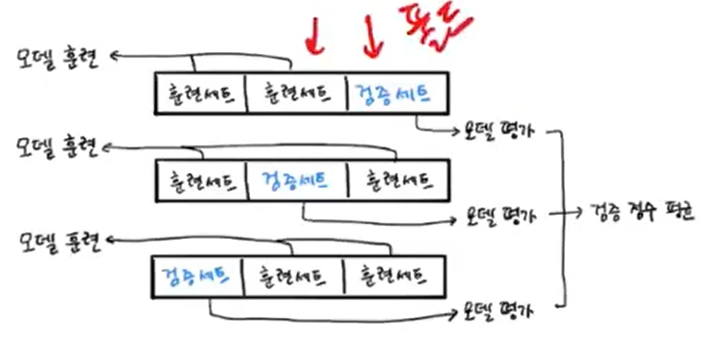

교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복한다.

그다음 이 점수를 평균하여 최종 검증 점수를 얻는다.

---

첫 번째 반복에서 훈련 세트를 세 부분(폴드)으로 나눠서 첫 번째와 두 번째의 폴드를 가지고 모델을 훈련하고 세 번째 폴드를 검증 세트로 사용해서 모델을 평가한다.

두 번째 반복에서 똑같이 훈련 세트를 세 폴드로 나눠서 첫 번째와 세 번째의 폴드를 가지고 모델을 훈련하고 두 번째 폴드를 검증 세트로 사용해서 모델을 평가한다.

세 번째 반복에서도 마찬가지로 두 번째와 세 번째의 폴드를 가지고 모델을 훈련하고 첫 번째 폴드를 검증 세트로 사용해서 모델을 평가한다.

폴드를 세 개로 나눴기 때문에 모델 평가 점수가 세 개가 나올 것이고, 세 개의 점수를 평균해서 얻은 검증 점수로 모델을 판단한다.

이렇게 훈련 세트를 세 부분으로 나눠서 교차 검증을 수행하는 것을 3-폴드 교차 검증이라고 한다.

훈련 세트를 몇 부분으로 나누냐에 따라 k-폴드 교차 검증(k-fold cross validation)이라고 하며, k-겹 교차 검증이라고도 부른다.

---

검증 세트의 크기가 줄어들지만 각 폴드에서 계산한 검증 점수를 평균하기 때문에, 모든 샘플이 한 번은 검증 세트의 역할을 하기 때문에 안정된 점수로 생각할 수 있다.

In [6]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01179814, 0.00879431, 0.00875115, 0.00930858, 0.00833964]), 'score_time': array([0.00098014, 0.00077319, 0.00100923, 0.00077152, 0.00092554]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


사이킷런에는 cross_validate()라는 교차 검증 함수가 있다.

사이킷런의 modle_selection 패키지 하위에 cross_validate를 임포트해서 사용하면 된다.

사용법은 먼저 평가할 모델 객체를 첫 번째 매개변수로 전달하고, 그 다음 앞에서처럼 직접 검증 세트를 떼어 내지 않고 훈련 세트 전체(train_input, train_target)를 전달하면 된다.

이 함수는 fit_time, score_time, test_score 키를 가진 딕셔너리를 반환한다.

---

기본적으로 5-폴드 교차 검증을 수행한다.

cv 매개변수에서 폴드 수를 지정하여 바꿀 수 있다.

cross_validate() 함수의 cv 매개변수는 기본적으로 5개의 폴드를 만들어서 교차검증을 수행한다.

만약 10개의 폴드를 만들어서 교차검증을 수행하고 싶으면 cv 매개변수에 10을 전달하면 된다.

fit_time, score_time 처음 2개의 키는 각각 모델을 훈련하는 시간과 검증하는 시간을 의미한다.

test_score 키는 검증 점수를 의미한다.

5-폴드 교차 검증을 수행하기때문에 5개의 모델을 만들어서 훈련하고 각 키마다 5개의 숫자가 담겨져 있다.

---

사이킷런에는 cross_val_score()함수도 있다.

이 함수는 cross_validate() 함수의 결과 중에서 test_score 값만 반환한다.

In [7]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


교차 검증의 최종 점수는 test_score 키에 담긴 5개의 점수를 평균하여 얻을 수 있다.

교차 검증을 수행하면 입력한 모델(하이퍼 파라미터를 가지고 만든 모델과 훈련할 때 사용한 훈련 데이터)에서 얻을 수 있는 최상의 검증 점수는 약 85%라는 것을 예측할 수 있다.

이렇게 나온 검증 점수가 좋지 않다면 하이퍼파라미터를 변경해서 훈련하면 된다.

※ 참고 ※

교차 검증과 그리드 서치는 머신러닝에서 자주 사용한다.

훈련 세트에서 일부를 떼어서 검증 세트로 만드는 방법은 딥러닝에서 자주 사용한다.

딥러닝 모델은 이미 데이터가 충분해서 훈련 세트에서 일부를 떼어내도 충분히 큰 데이터를 확보할 수 있다.

게다가 딥러닝 모델 자체가 자원을 많이 사용하는데 교차 검증은 여러 번의 훈련을 통해 여러 개의 점수를 얻는다. 이런 교차 검증을 딥러닝에 사용하면 비효율적이다.

그래서 텐서플로우나 케라스 딥러닝라이브러리들은 교차 검증이나 그리드 서치 관련 도구가 많지 않다.

오히려 데이터가 많기 때문에 그 많은 데이터를 효율적으로 읽어들이는 도구들이 많다.

반대로 사이킷런 머신러닝라이브러리들은 데이터를 읽어들이는 도구보다도 읽어들인 데이터를 최대한 효율적으로 활용할 수 있는 도구들이 많다.

# **분할기(Splitter)**

In [8]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


사실 cross_validate() 함수는 훈련 세트를 섞어 폴드를 나누지 않는다.

앞서 train_test_splist() 함수로 전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요는 없다.

하지만 만약 교차 검증을 할 때 훈련 세트를 섞으려면 분할기를 지정해야 한다.

---

사이킷런의 분할기는 교차 검증에서 폴드를 어떻게 나눌지 결정해 준다.

분할기를 지정할 때도 cv 매개변수에 사용할 분할기를 전달하면 된다.

cross_validate() 함수는 기본적으로 KFold 분할기를 사용한다.

하지만 cross_validate() 함수는 첫 번째 매개변수에 들어오는 객체에 따라서 객체가 회귀모델이면 자동으로 KFold 분할기를 사용하고, 분류모델이면 타깃 클래스를 골고루 나누기 위해 자동으로 StratifitedKFold를 사용한다.

In [9]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


만약 훈련 세트를 섞은 후 10-폴드 교차 검증을 수행하고 싶다면

분할기 객체를 만들어서 n_splits 매개변수를 10으로 지정하고, shuffle 매개변수를 True로 지정하면 된다.

n_splits 매개변수는 몇(k) 폴드 교차 검증을 할지 지정할 수 있고, shuffle 매개변수는 훈련 세트를 섞을지 안섞을지 지정할 수 있다.

이렇게 폴드를 상세하게 제어하고 싶을 때는 위처럼 사용하면 된다.

# **그리드 서치(Grid Search)**

머신러닝 모델이 학습하는 파라미터를 모델 파라미터라고 부른다.

반면에 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터를 하이퍼파라미터라고 부른다.

사이컷런과 같은 머신러닝 라이버르리를 사용할 때 하이퍼파라미터는 모두 클래스나 매소드의 매개변수로 표현된다.

---

하이퍼파라미터 튜닝으로 최상의 모델을 찾아야한다.

하이퍼파라미터 튜닝하는 작업은 어떻게 진행할까?

먼저 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련하고, 그다음 검증 세트의 점수나 cross_validate()함수를 호출해 교차 검증을 통해서 매개변수를 조금씩 바꿔가면서 여러 번 모델을 훈련하면 된다.

하지만 이 방법은 너무 번거롭다.

또한 위의 방법으로 한다해도 아주 중요한 점이 있다.

가령 결정 트리 모델에서 최적의 max_depth 값을 찾았다고 가정해보자.

그다음 max_depth를 최적의 값으로 고정하고 min_samples_split를 바꿔가면 최적의 값을 찾는다.

사실 이렇게 한 매개변수의 최적값을 찾고 다른 매개변수의 최적값을 찾는 방법은 틀린 방법이다.

불행하게도 max_depth의 최적값은 min_samples_split 매개변수의 값이 바뀌면 함께 달라진다.

즉 두 매개변수를 동시에 바꿔가면 최적의 값을 찾아야 하는 것이다.

그렇게 되면 매개변수가 많아질수록 문제는 더 복잡해질 것이다.

---

for루프문으로 위의 과정을 직접 구현할 수 있지만 다행히도 사이킷런의 GridSearchCV클래스는 친절하게도 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행한다.

즉, GridSearchCV 클래스는 여러 개의 매개변수를 바꿔가면서 cross_validate()를 수행해준다.

In [10]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

그리드 서치는 사이킷런의 model_selection 하위의 GridSearchCV를 임포트해서 사용할 수 있다.

우선 기본 매개변수를 사용한 결정 트리 모델에서 min_impurity_decrease 매개변수의 최적값을 찾아보겠다.

GridSearchCV 클래스를 사용하는 방법은 우선 탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만드는 것이다.

어떤 매개변수가 최적인지 모르니 우선 0.0001부터 0.0005까지 0.0001씩 증가하는 5개의 값으로 시도했다.

---

※ 여기서 잠깐 ※

min_impurity_decrease 매개변수는 부모와 자식 노드의 불순도 차이(정보이득)의 최솟값이다.

만약 0.1로 지정했을 때 불순도 차이가 0.1보다 작으면 노드를 분할하지 않는다.

이 매개변수도 가지치기의 하나로 사용할 수 있다.

In [11]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

그리고 GridSearchCV 클래스의 객체를 만들 때 첫 번째 매개변수에 결정 트리 객체를, 두 번째 매개변수에 아까 만든 딕셔너리를 전달하면 된다.

여기서는 결정 트리 클래스를 생성하자마자 GridSearchCV 클래스에 전달한 것이다.

GridSearchCV의 cv 매개변수 기본값은 5이다. 따라서 min_impurity_decrease 값마다 5-폴드 교차 검증을 수행하므로 결국 5 * 5 = 25개의 모델을 훈련한다.

많은 모델을 훈련하기 때문에 GridSearchCV 클래스의 n_jobs 매개변수에서 병렬 실행에 사용할 CPU 코어 수를 지정하는 것이 좋다.

이 매개변수의 기본값을 1인데 -1로 지정하면 시스템에 있는 모든 코어를 사용한다.

In [12]:
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
    

사이킷런의 api특징은 어떤 객체를 만들면 그 객체를 일반 모델을 훈련하는 것처럼 동일한 방식으로 fit()메소드로 훈련할 수 있다.

fit()메소드를 사용하면 5개의 min_impurity_decrease 값에 대해서 5-폴드 교차 검증을 모두 다 수행한다.

In [13]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


앞에서 교차 검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 
다시 만들어야 했다.

아주 편리하게도 사이킷런의 그리드 서치는 훈련이 끝나면 25개의 모델 중에서 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련 세트에서 자동으로 다시 모델을 훈련한다.

이 모델은 객체의 best_estimator_속성에 저장되어 있다.

In [14]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


그리드 서치로 찾은 매개변수는 객체의 best_params_속성에 저장되어 있다.

In [15]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_속성의 mean_test_score키에 저장되어 있다.

In [16]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


넘파이 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.

그다음 이 인덱스를 사용해 params 키에 저장된 매개변수를 출력할 수 있다.

이 값이 최상의 검증 점수를 만든 매개변수 조합이다.

앞에서 출력한 best_params_속성에 들어있는 그리드 서치로 찾은 매개변수와 동일하다.

※ 정리 ※

1. 먼저 탐색할 매개변수를 지정한다.

2. 그다음 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾는다.이 조합은 그리드 서치 객체에 저장된다.

3. 그리드 서치는 최상의 매개변수에서 (교차 검증에 사용한 훈련 세트가 아니라) 전체 훈련 세트를 사용해 최종 모델을 훈련한다. 이 모델도 그리드 서치 객체에 저장된다.

In [17]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

만약 더 복잡한 매개변수 조합을 탐색해보고 싶다면 위의 코드처럼 해보면 된다.

---

min_impurity_decrease 매개변수는 노드를 분할하기 위한 불순도 감소 최소량을 지정한다.

max_depth 매개변수는 트리의 깊이를 제한한다.

min_samples_split 매개변수는 노드를 나누기 위한 최소 샘플 수를 지정한다. 이 매개변수도 가지치기 일환으로 사용할 수 있다.

---

넘파이 arange()함수는 첫 번째 매개변수 값에서 시작하여 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더한 배열을 만든다.

0.0001에서 시작하여 0.001이 될 때까지 0.0001을 계속 더한 배열이다.

두 번째 매개변수는 포함되지 않으므로 배열의 원소는 총 9개이다.

파이썬 range()함수도 넘파이의 arange()함수와 비슷하지만 이 함수는 정수만 사용할 수 있다.

max_depth를 5에서 20까지 1씩 증가하면서 15개의 값을 만든다.

min_samples_split은 2에서 100까지 10씩 증가하면서 10개의 값을 만든다.

---

따라서 이 매개변수로 수행할 교차 검증 횟수는 9 * 15 * 10 = 1350개이다.

기본 5-폴드 교차 검증을 수행하므로 만들어지는 모델의 수는 1350 * 5 = 6750개가 된다.

In [18]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'm

위에서 훈련한 것처럼 n_jobs 매개변수를 -1로 지정하여 모든 코어를 사용하여 그디르 서치를 실행했다.

In [19]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


최상의 매개변수 조합

In [20]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


최상의 교차 검증 점수

# **랜덤 서치(Random Search)**

매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있다.

또한 탐색할 매개변수가 많고 간격을 좁게 그리드 서치를 사용하면 많은 자원이 필요하다.

그래서 나온 것이 랜덤 서치이다.

---

랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달한다.

**확률 분포 선택**

랜덤 서치를 사용하려면 싸이파이의 확률 분포 클래스를 사용해야한다.

싸이파이의 stats 패키지 하위에 uniform과 randint 클래스는 균등 분포에서 샘플링한다.

즉, 주어진 범위에서 고르게 값을 뽑는다.

만약 0 ~ 10 사이의 값을 뽑는다면 5가 10개 나오면 10도 10개가 나오는 이런 식으로 고르게 샘플링되는 것이다.

randint는 정숫값을 뽑고, uniform은 실숫값을 뽑는다.

---

※ 여기서 잠깐 ※

싸이파이는 파이썬의 핵심 과학 라이브러리 중 하나이다.

적분, 보간, 선형 대수, 확률 등을 포함한 수치 계산 전용 라이브러리이다.

사이킷런은 넘파이와 싸이파이 기능을 많이 사용한다.

In [21]:
from scipy.stats import uniform, randint

우선 싸이파이의 uniform과 randint 클래스를 임포트한다.

In [22]:
rgen = randint(0, 10)
rgen.rvs(10)

array([4, 1, 8, 0, 1, 8, 9, 2, 3, 3])

0에서 10 사이의 범위를 갖는 randint 객체를 만들고 rvs()메소드(랜덤배치샘플링)에 10을 전달하면 10개의 숫자를 샘플링한다.

위의 결과는 10개밖에 되지 않기 때문에 고르게 샘플링되는 것 같지 않지만 샘플링 숫자를 늘리면 쉽게 확인할 수 있다.

In [23]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 82, 107, 124,  85, 103,  96, 106,  99, 111,  87]))

rvs()메소드에 1000을 전달해서 1000개를 샘플링했다.

그리고 넘파이의 unique함수에 전달해서 각 숫자의 개수를 count했다.

개수가 늘어나니 0에서 9까지의 숫자가 어느 정도 고르게 추출되었다.

In [24]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.81706908, 0.29448704, 0.57311019, 0.93252967, 0.67087593,
       0.39019156, 0.82286774, 0.03459312, 0.69244986, 0.81914855])

uniform 클래스의 사용법도 비슷한다.

0~1사이에서 10개의 실수를 추출해보았다.

랜덤 서치에 randint와 uniform 클래스 객체를 넘겨주고 총 몇 번을 샘플링해서 최적의 매개변수를 찾으라고 명령할 수 있다.

샘플링 횟수는 시스템 자원 허락하는 범위 내에서 최대한 크게 하는 것이 좋다.

In [25]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

이번에는 min_samples_leaf 매개변수를 탐색 대상에 추가했다.

이 매개변수는 리프 노드가 되기 위한 최소 샘플의 개수다.

어떤 노드가 분할하여 만들어질 자식 노드의 샘플 수가 이 값보다 작을 경우 분할하지 않는다. 

---

min_imputiry_decrease는 0.0001에서 0.001 사이의 실숫값을 샘플링한다.

max_depth는 20에서 50 사이의 정수값을 샘플링한다.

min_samples_split는 2에서 25사이의 정숫값을 샘플링한다.

min_samples_leaf는 1에서 25사이의 정수값을 샘플링한다.

In [26]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
         

랜덤 서치는 사이킷런의 modle_selection 패키지 하위의 RandomizedSearchCV클래스를 임포트해서 사용하면 된다.

샘플링 횟수는 n_iter 매개변수에 지정하면 된다.

---

위 params에 정의된 매개변수 범위에서 총 100번(n_iter 매개변수)을 샘플링하여 교차 검증을 수행하고 최적의 매개변수 조합을 찾는다.

n_iter 매개변수로 랜덤 서치의 반복 횟수를 지정한다.

매회 반복에서 min_impurity_decrease, max_depth, min_samples_split, min_samples_leaf를 랜덤하게 선택한다.

이 때 randint와 uniform 객체의 rvs 메서드를 사용해 랜덤한 값을 뽑는다.
따라서 랜덤 서치는 총 100*5개의 모델이 만들어진다.

In [27]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


최적의 매개변수 조합

In [28]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


최고의 교차 검증 점수(최적의 매개변수를 조합해서 찾은 검증 점수)

In [29]:
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


최적의 모델은 이미 전체 훈련 세트(train_input, train_target)로 훈련되어 best_estimator_ 속성에 저장되어 있다.

이 모델을 최종 모델로 결정하고 테스트 세트의 성능을 확인해보니 0.86 점수가 나왔다.

---

테스트 세트 점수는 검증 세트에 대한 점수보다 조금 작은 것이 일반적이다.